Loading the dataset

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 💬 Set Korean font (Malgun Gothic)
plt.rc('font', family='Malgun Gothic')

# 📉 Prevent minus sign from breaking
plt.rcParams['axes.unicode_minus'] = False


In [8]:
import pandas as pd

In [9]:
data_path = r"C:\Users\ghwns\HJ_git\sales-forecasting_smallbiz\data\sales-forcasting-smallbiz.xlsx"

In [10]:
df = pd.read_excel(data_path)

Quick overview and missing value check

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67900 entries, 0 to 67899
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년분기_코드        67900 non-null  int64 
 1   행정동_코드           67900 non-null  int64 
 2   행정동_코드_명         67900 non-null  object
 3   서비스_업종_코드        67900 non-null  object
 4   서비스_업종_코드_명      67900 non-null  object
 5   당월_매출_금액         67900 non-null  int64 
 6   당월_매출_건수         67900 non-null  int64 
 7   주중_매출_금액         67900 non-null  int64 
 8   주말_매출_금액         67900 non-null  int64 
 9   월요일_매출_금액        67900 non-null  int64 
 10  화요일_매출_금액        67900 non-null  int64 
 11  수요일_매출_금액        67900 non-null  int64 
 12  목요일_매출_금액        67900 non-null  int64 
 13  금요일_매출_금액        67900 non-null  int64 
 14  토요일_매출_금액        67900 non-null  int64 
 15  일요일_매출_금액        67900 non-null  int64 
 16  시간대_00~06_매출_금액  67900 non-null  int64 
 17  시간대_06~11_매출_금액  67900 non-null

In [16]:
df.isnull().sum()

기준_년분기_코드          0
행정동_코드             0
행정동_코드_명           0
서비스_업종_코드          0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
주중_매출_건수           0
주말_매출_건수           0
월요일_매출_건수          0
화요일_매출_건수          0
수요일_매출_건수          0
목요일_매출_건수          0
금요일_매출_건수          0
토요일_매출_건수          0
일요일_매출_건수          0
시간대_건수~06_매출_건수    0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
시간대_건수~24_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10_매출_건수 

Starting EDA

In [30]:
df_subset = df[["기준_년분기_코드", "행정동_코드_명", "당월_매출_금액", "서비스_업종_코드_명"]].copy()  # Extract relevant columns

In [31]:
df_grouped = df_subset.groupby(["기준_년분기_코드", "행정동_코드_명", "서비스_업종_코드_명"])["당월_매출_금액"].sum().reset_index()

In [32]:
df_grouped = df_grouped.sort_values(by = ["기준_년분기_코드", "당월_매출_금액"], ascending = True)

In [36]:
df_grouped.tail()

기준_년분기_코드 행정동_코드_명 서비스_업종_코드_명      당월_매출_금액
50897      20244     가락1동        반찬가게  322179543735
66600      20244     한강로동  컴퓨터및주변장치판매  409043919885
51071      20244      가산동        일반의류  521537847732
64832      20244      제기동         청과상  643028358702
53098      20244    노량진2동       수산물판매  840991939297

시각화

In [42]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # 한글 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [37]:
# 예: 특정 분기에서 가장 매출 높은 업종 Top 10
top10_services = df_grouped[df_grouped['기준_년분기_코드'] == 20244]\
                    .sort_values(by='당월_매출_금액', ascending=False)\
                    .head(10)

top10_services

기준_년분기_코드     행정동_코드_명 서비스_업종_코드_명      당월_매출_금액
53098      20244        노량진2동       수산물판매  840991939297
64832      20244          제기동         청과상  643028358702
51071      20244          가산동        일반의류  521537847732
66600      20244         한강로동  컴퓨터및주변장치판매  409043919885
50897      20244         가락1동        반찬가게  322179543735
53058      20244        노량진1동       수산물판매  307635301739
64915      20244  종로1·2·3·4가동      시계및귀금속  213400554179
64181      20244         잠실6동        일반의류  182403461000
54248      20244         독산1동        육류판매  161198998260
66564      20244         한강로동        가전제품  149685260484

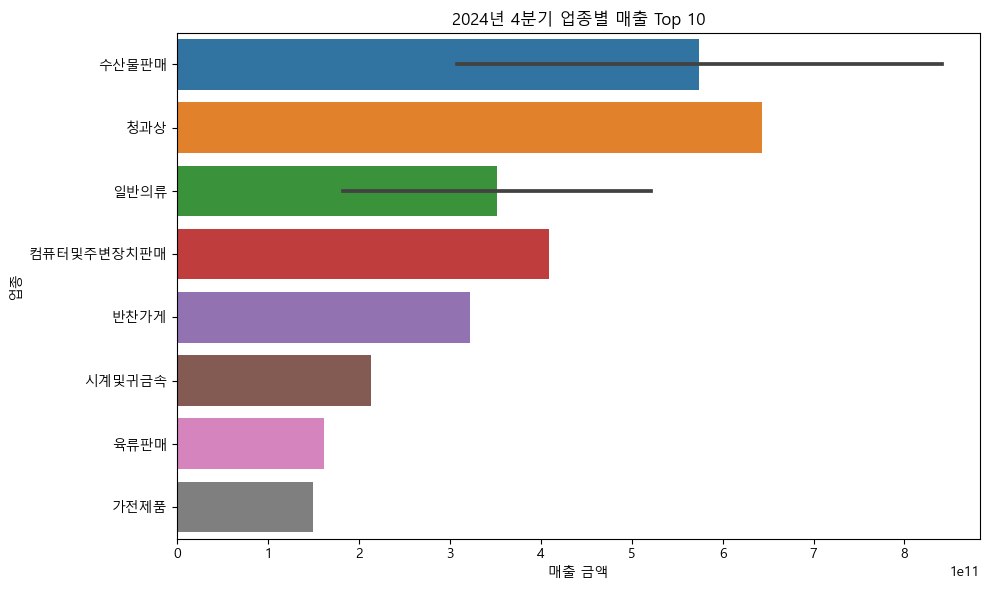

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.barplot(data=top10_services, y='서비스_업종_코드_명', x='당월_매출_금액')
plt.title("2024년 4분기 업종별 매출 Top 10")
plt.xlabel("매출 금액")
plt.ylabel("업종")
plt.tight_layout()
plt.show()

In [45]:
df_grouped = df_grouped.sort_values(by = ["당월_매출_금액"], ascending = True)

In [46]:
df_grouped

기준_년분기_코드 행정동_코드_명 서비스_업종_코드_명      당월_매출_금액
8690       20241      송천동          가구           577
32281      20242     천호3동      가전제품수리           630
59232      20244   성수2가1동          가구          1145
38289      20243     면목7동       자동차미용          1216
46187      20243    원효로1동         핸드폰          3460
...          ...      ...         ...           ...
64832      20244      제기동         청과상  643028358702
36203      20243    노량진2동       수산물판매  644703384404
19226      20242    노량진2동       수산물판매  679979678056
2212       20241    노량진2동       수산물판매  836995049838
53098      20244    노량진2동       수산물판매  840991939297

[67724 rows x 4 columns]